In [1]:
#cell process

In [2]:
#import python Libraries
import gzip
import numpy as np
import csv, os
import pandas as pd
from os import listdir
from os.path import isfile, join
import gzip
import sys

In [3]:
#set up paths
data = 'GSE82187'

inpath = './GSE82187/'
outpath = './GSE82187/'
try:
    os.makedirs(outpath)
except:
    print()

In [4]:
#load 3 input files

meta = pd.read_csv(outpath + data + '_meta.csv')
aux = pd.read_csv(outpath+data + '_sample.csv')
raw_data = pd.read_csv(inpath + 'GSE82187_cast_all_forGEO.csv')

In [5]:
#Filter only 'Mic-scRNA-Seq' entries
Exp_Name_list = []
Cell_type_list = []
for idx_p, protocol in enumerate(raw_data['protocol']):
    if protocol == 'Mic-scRNA-Seq':
        Exp_Name_list.append( raw_data['cell.name'][idx_p])
        Cell_type_list.append(raw_data['type'][idx_p])

In [ ]:
#Match sample name
Sample_Name_list = []
for exp_name in Exp_Name_list:
    found = False
    for idx_s, sample in enumerate(aux['Accession']):
        if exp_name in aux['Title'][idx_s]:
            found = True
            break
    if found == False:
        print('Exp name in raw data and aux file does not match')
    Sample_Name_list.append(sample)

no_dup = 0

In [7]:
#Track number of cells
unique = list(set(Cell_type_list))
unique.sort()

N = len(Sample_Name_list)
print('Number of cells:', N)

Number of cells: 705


In [8]:
#Do a quick check to make sure that raw data and labels match

cell_name_check = list(raw_data['cell.name'])
cell_type_check = list(raw_data['type'])


In [9]:
#construct the gene list
gene_list = list(raw_data.keys())[5:]   #the first row contains the gene info
for idx_gene, gene in enumerate(gene_list):
    gene_list[idx_gene] = gene.upper()

MATRIX = raw_data.values[:705, 5:].astype(float)
MATRIX = MATRIX.T

if MATRIX.shape[0] == len(gene_list) and MATRIX.shape[1] == N:
    print('Dimension of the gene and cell matches!')
else:
    print('WARNING: DIMENSION OF THE MATRIX DOES NOT MATCH')

Dimension of the gene and cell matches!


In [10]:
#################
#################
#Write data for full data
#cell_type_unique = list(set(list(cell_type_full_list)))  #used if the cell_type makes sense
print('Writing the Full Data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
cell_type_unique = unique


Writing the Full Data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [11]:
#write label dictionary
cell_type_dict = {i: cell_type_unique[i] for i in range(len(cell_type_unique)) }  #dict to map index to cell type
cell_type_dict_rev = {cell_type_unique[i]:i for i in range(len(cell_type_unique))}  #reverse dict from cell type to index
file = open(outpath + data + '_full_labeldict.txt', 'w')   #write a dictionary
file.writelines(str(cell_type_dict) + ' \n')
file.writelines(str(cell_type_dict_rev) + ' \n')
file.close()
cell_count =  {cell_type_unique[i]:0 for i in range(len(cell_type_unique))}
Sample_Name_list = Sample_Name_list
Cell_label_list = []
for idx in range(len(Cell_type_list)):  #iterate over all the samples
    cell_type = Cell_type_list[idx]     #get the current cell type
    try:   #see if the cell type exist in the dictionary
        cell_label = cell_type_dict_rev[cell_type]
        cell_count[cell_type] += 1
        Cell_label_list.append(cell_label)
        found = True
    except:
        found = False    #if it is not found, print message
        print(Sample_Name_list[idx], cell_type, 'Wrong cell type')

print('Cell Count')

Cell Count


In [12]:
#save labels and genes
for k in cell_count.keys():
    print('%s:'%k, cell_count[k])

with open(outpath + data + '_full_labels.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Sample Name', 'Cell type', 'Label'])
    for idx in range(len(Cell_type_list)):
        writer.writerow([Sample_Name_list[idx], Cell_type_list[idx] , Cell_label_list[idx]])
        
                
with open(outpath + data + '_full_gene.csv', "w", newline = '') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['Index', 'Gene'])
    for idx, gene in enumerate(gene_list):
        writer.writerow([idx, gene])

Astro: 107
Ependy-C: 18
Ependy-Sec: 21
Macrophage: 71
Microglia: 48
NSC: 7
Neuron: 334
OPC: 13
Oligo: 43
Vascular: 43


In [13]:
#save the expression matrix
with open(outpath + data + '_full_data.csv', "w", newline = '') as csv_file: #output file for data
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['Row', 'Col', 'Val'])
    for idx_col in range(len(Sample_Name_list)):
        for idx_row in range(len(gene_list)):
            if MATRIX[idx_row, idx_col] > 0:
                writer.writerow([idx_row, idx_col, MATRIX[idx_row, idx_col]])
                    
with open(outpath + data + '_full_X.csv', "w", newline = '') as csv_file: #output file for data
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow( [None] + Sample_Name_list)
    for idx_row in range(len(gene_list)):
        row = list(MATRIX[idx_row, :])
        writer.writerow([gene_list[idx_row] ] + row)

In [14]:
raw_data["cell.name"].str.split()


0                     [1-0-0-0-BTN22-C34-8ul-1]
1       [1-0-0-0-BTN24-C29-18ul-IL5195-708-502]
2       [1-0-0-0-BTN24-C59-22ul-IL5195-710-505]
3       [1-0-0-0-BTN24-C70-12ul-IL5195-709-508]
4        [1-0-0-0-BTN24-C76-8ul-IL5195-701-507]
                         ...                   
1203          [H9_1000700401-OGC7-coc_1_12ul_1]
1204         [H9_1000700602-OGC11-sal_1_10ul_1]
1205          [H9_1000701001-OGC14-sal_1_6ul_1]
1206          [H9_1000701201-OGC16-sal_1_6ul_1]
1207          [H9_1000701204-OGC16-sal_1_4ul_1]
Name: cell.name, Length: 1208, dtype: object

In [15]:
raw_data

,Unnamed: 0,cell.name,type,experiment,protocol,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,...,Xkr9,Xlr4c,Zfp352,Zfp366,Zfp36l3,Zfp474,Zfp735,Zfp936,Zic5,Zscan10
0,1,1-0-0-0-BTN22-C34-8ul-1,Neuron,BTN22,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2,1-0-0-0-BTN24-C29-18ul-IL5195-708-502,Neuron,BTN24,Mic-scRNA-Seq,0.0,1.828000,0.000000,0.0,1.751656,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,3,1-0-0-0-BTN24-C59-22ul-IL5195-710-505,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.016060,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,4,1-0-0-0-BTN24-C70-12ul-IL5195-709-508,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.547597,3.004959,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,5,1-0-0-0-BTN24-C76-8ul-IL5195-701-507,Neuron,BTN24,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1204,H9_1000700401-OGC7-coc_1_12ul_1,Neuron,OGC07-sal,FACS-scRNA-Seq,0.0,1.911050,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1204,1205,H9_1000700602-OGC11-sal_1_10ul_1,Neuron,OGC11-sal,FACS-scRNA-Seq,0.0,1.875535,2.183359,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1205,1206,H9_1000701001-OGC14-sal_1_6ul_1,Neuron,OGC14-sal,FACS-scRNA-Seq,0.0,1.953439,1.340484,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1206,1207,H9_1000701201-OGC16-sal_1_6ul_1,Neuron,OGC16-sal,FACS-scRNA-Seq,0.0,1.407535,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [16]:
meta['GEO_Accession (exp)']

0       GSM2188962
1       GSM2188962
2       GSM2188962
3       GSM2188962
4       GSM2188963
           ...    
3769    GSM2190168
3770    GSM2190168
3771    GSM2190168
3772    GSM2190168
3773    GSM2190169
Name: GEO_Accession (exp), Length: 3774, dtype: object

In [17]:
#tPCA

In [18]:
import os
os.getcwd()

'/home/yoeu'

In [19]:
!pip install clusim


Defaulting to user installation because normal site-packages is not writeable


In [20]:
#import necessary modules
import numpy as np
import pandas as pd
import warnings
import os
import sys
sys.path.append('Topological-PCA/Model')

from tPCA import RpLSPCA_cal_projections_KNN 
from tPCA import RpLSPCA_cal_projections 
from RgLSPCA import RgLSPCA_cal_projections
from sPCA import SPCA_cal_projections
from PCA import PCA_cal_projections
from umap.umap_ import UMAP
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from clusim.clustering import Clustering
import clusim.sim as sim
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


In [21]:
#define dataset root path
rootPath = './Topological-PCA'

In [22]:
#define functions to load preprocessed input
def load_X(data):
    inpath = './' + data + '/'  # no /Tests/ and no repeat
    X = pd.read_csv(inpath + '%s_full_X.csv' % data)
    X = X.values[:, 1:].astype(float)
    return X

def load_y(data):
    inpath = './' + data + '/output/'
    y = pd.read_csv(inpath + '%s_full_labels.csv' % data)
    y = np.array(list(y['Label'])).astype(int)
    return y

if __name__ == '__main__':
    X = load_X("GSE82187")
    y = load_y("GSE82187")
    
    # 1e4 Normalizaton for count matrices
    if sys.argv[1] in ['GSE67835', 'GSE84133human1', 'GSE84133human2', 'GSE84133human3', 'GSE84133mouse1', 'GSE84133mouse2']:
        # total counts for each cell 
        cell_totals = np.sum(X, axis=0)
        # scaling factors
        scaling_factors = np.array(1e4 / cell_totals)
        # Normalize matrix
        X = scaling_factors * X

In [23]:
    # Log transform data
    log_transform = np.vectorize(np.log)
    log_X = log_transform(X+1)

    # Set values below 1e-6 to 0
    log_X[log_X < 1e-6] = 0

    print('X shape:', X.shape)
    print("y shape:", y.shape)

    # Filter out features with low variance
    row_variances = np.var(log_X, axis=1)
    variance_threshold = np.percentile(row_variances, 25)  # Adjust the percentile as needed
    filtered_X = log_X[row_variances >= variance_threshold]
    print('Post gene filtering X shape:', filtered_X.shape)

X shape: (18840, 705)
y shape: (705,)
Post gene filtering X shape: (14130, 705)


In [24]:
    # Filter out classes with fewer than 15 samples
    filtered_X_transposed = filtered_X.T
    # Get the unique classes and their counts
    unique_classes, class_counts = np.unique(y, return_counts=True)
    # Find the classes with less than 15 samples
    classes_to_remove = unique_classes[class_counts < 15]
    # Create a mask to filter the samples and labels
    mask = np.isin(y, classes_to_remove, invert=True)
    # Filter the dataset and labels
    X_filtered = filtered_X_transposed[mask].T
    y_filtered = y[mask]
    # Print the filtered dataset and labels
    print("Filtered X shape:", X_filtered.shape)
    print("Filtered y shape:", y_filtered.shape)

Filtered X shape: (14130, 685)
Filtered y shape: (685,)


In [25]:
def get_parameters(self, dataset_name):
    param_row = self.param_df[self.param_df['dataset'] == dataset_name]

In [26]:
    # Standardize the
    scaler = StandardScaler()
    scaler.fit(X_filtered)
    X_normalized = scaler.transform(X_filtered)
    

In [27]:
class ParameterWrapper:
    def __init__(self, file_path):
        self.param_df = pd.read_csv(file_path)

    def get_parameters(self, dataset_name):
        param_row = self.param_df[self.param_df['Dataset'] == dataset_name]
        if param_row.empty:
            raise ValueError(f"Dataset {dataset_name} not found in parameter file.")
        return param_row.iloc[0]


In [28]:
#extracting exact parameter values specific for kNN-tPCA
param_wrapper = ParameterWrapper(rootPath + '/Tests/paramvals_kNNtPCA.csv')
params_dataset1 = param_wrapper.get_parameters('GSE82187')
print('kNN-tPCA Parameters:', params_dataset1)

k = np.unique(y_filtered).shape[0]  # Num Clusters = Num Dimensions
zeta = [float(params_dataset1['zeta1']), float(params_dataset1['zeta2']),
        float(params_dataset1['zeta3']), float(params_dataset1['zeta4']),
        float(params_dataset1['zeta5']), float(params_dataset1['zeta6']),
        float(params_dataset1['zeta7']), float(params_dataset1['zeta8'])]
zeta = np.array(zeta)
gamma = float(params_dataset1['gamma'])
beta = float(params_dataset1['beta'])


kNN-tPCA Parameters: Dataset    GSE82187
zeta1             1
zeta2           0.5
zeta3      0.333333
zeta4          0.25
zeta5           0.2
zeta6      0.166667
zeta7      0.142857
zeta8         0.125
gamma      100000.0
beta           60.0
Name: 0, dtype: object


In [29]:
# Get parameters for a specific dataset for tPCA
param_wrapper2 = ParameterWrapper(rootPath + '/Tests/paramvals_tPCA.csv')
params_dataset2 = param_wrapper2.get_parameters('GSE82187')
print('tPCA Parameters:', params_dataset2)  

zeta2 = [float(params_dataset2['zeta1']), float(params_dataset2['zeta2']), 
            float(params_dataset2['zeta3']), float(params_dataset2['zeta4']),
            float(params_dataset2['zeta5']), float(params_dataset2['zeta6']),
            float(params_dataset2['zeta7'])]
zeta2 = np.array(zeta2)
gamma2 = float(params_dataset2['gamma'])
beta2 = float(params_dataset2['beta'])

X_filtered= np.asarray(X_filtered)
X_normalized = np.asarray(X_normalized)

tPCA Parameters: Dataset          GSE82187
zeta1                   0
zeta2                   1
zeta3                   0
zeta4                   4
zeta5                   0
zeta6                   5
zeta7                   1
beta                   60
gamma                1000
 t          max_dist**(2)
Name: 0, dtype: object


In [30]:
def computeKMeans(X, y, max_state = 30):
    '''
        compute k-means clustering for the reduction with 30 random instance
        input:
            X: M x N data
            y: M * 1 true labels
            max_state: number of k-means state
        return:
            LABELS: max_state * M label from k-means
            ARI: max_state * 1 ari for each instance of k-means
            NMI: max_state * 1 nmi for each instance of k-means
            Sil: max_state * 1 silhouette score for each instance of k-means
    '''
    M = X.shape[0]
    n_clusters = np.unique(y).shape[0]
    X_scaled = StandardScaler().fit_transform(X)
    LABELS = np.zeros([max_state, M])
    ARI = np.zeros(max_state); NMI = np.zeros(max_state); ECS = np.zeros(max_state)
    for state in range(max_state):
        myKM = KMeans(n_clusters = n_clusters,  n_init = 150, random_state = state)
        myKM.fit(X_scaled)
        label = myKM.labels_
        ARI[state], NMI[state] = computeClusterScore(y, label)
        ECS[state] = computeElementCenstricScore(y, label)
        LABELS[state, :] = label
    return ARI, NMI, ECS

In [31]:
%%time

print('---------------RpLSPCA KNN-------------')
 #Principal Components
PDM = RpLSPCA_cal_projections_KNN(X_normalized.T, beta, gamma, k, 15, zeta)
PDM = np.asarray(PDM)
TM = ((np.linalg.inv(PDM.T @ PDM)) @ (PDM.T)).T

    #Projected Data Matrix
Q = (X_normalized.T @ TM)

---------------RpLSPCA KNN-------------
CPU times: user 37min 11s, sys: 8.09 s, total: 37min 19s
Wall time: 18min 44s


In [32]:
def computeClusterScore(y, label):
    #compute the clustering scores
    #ARI, NMI scores
    ari = adjusted_rand_score(y, label)
    nmi = normalized_mutual_info_score(y, label)
    return ari, nmi

def computeElementCenstricScore(y, label):
    clustering1 = Clustering().from_membership_list(y)
    clustering2 = Clustering().from_membership_list(label)
    score = sim.element_sim(clustering1, clustering2, alpha=0.9)
    return score


In [33]:
    #Clustering
RpLSPCA_KNN_ari, RpLSPCA_KNN_nmi, RpLSPCA_KNN_ecs = computeKMeans(Q, y_filtered, max_state=30)
RpLSPCA_KNN_ari_mean = (RpLSPCA_KNN_ari.sum()) / 30
RpLSPCA_KNN_nmi_mean = (RpLSPCA_KNN_nmi.sum()) / 30
RpLSPCA_KNN_ecs_mean = (RpLSPCA_KNN_ecs.sum()) / 30
print('kNN-tPCA ARI:', RpLSPCA_KNN_ari_mean)
print('kNN-tPCA NMI:', RpLSPCA_KNN_nmi_mean)
print('kNN-tPCA Element Centric Score:', RpLSPCA_KNN_ecs_mean)

kNN-tPCA ARI: 0.9932492572986918
kNN-tPCA NMI: 0.9853939295776893
kNN-tPCA Element Centric Score: 0.9884788557694077


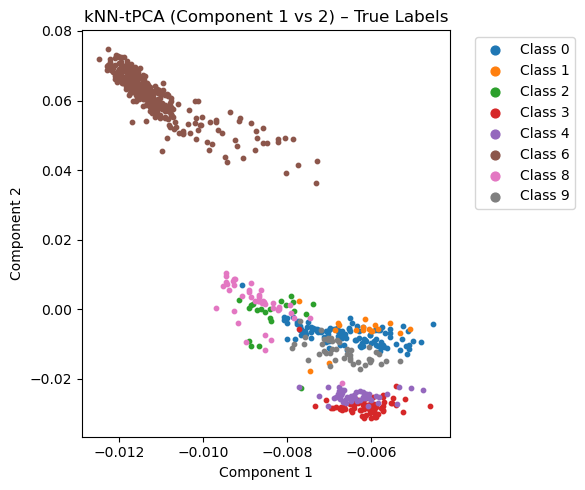

In [34]:
# Scatterplot of first two kNN-tPCA components colored by true labels
X_scaled = scaler.fit_transform(X_filtered).T  # shape: (685, 14130)
Q_knntpca = X_scaled @ TM 
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
unique_lbls = np.unique(y_filtered)
for lbl in unique_lbls:
    idx = np.where(y_filtered == lbl)[0]
    plt.scatter(Q_knntpca[idx, 0], Q_knntpca[idx, 1], s=10, label=f"Class {lbl}")
plt.title("kNN-tPCA (Component 1 vs 2) – True Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [35]:
def cal_persistent_laplace(W_L, zetas):
    n = W_L.shape[0]
    np.fill_diagonal(W_L, 0)

    L = cal_laplace(W_L)
    np.fill_diagonal(L, 1e8)  # Mask diagonal for min
    min_l = np.min(L[np.nonzero(L)])

    np.fill_diagonal(L, -1e8)  # Mask diagonal for max
    max_l = np.max(L[np.nonzero(L)])
    d = max_l - min_l

    L = cal_laplace(W_L)

    # Set up PL for 7 filtrations only (k=1 to 7)
    PL = np.zeros((7, n, n))
    for i, k in enumerate(range(1, 8)):
        PL[i, :, :] = np.where(L < (k / 7 * d + min_l), 1, 0)
        np.fill_diagonal(PL[i, :, :], 0)
        PL[i, :, :] = cal_laplace(PL[i, :, :])

    zetas = np.array(zetas)
    P_L = np.sum(zetas[:, np.newaxis, np.newaxis] * PL, axis=0)

    return P_L

In [36]:
 print('-----------------sPCA-----------------')
    #Dimensionality Reduction (data unscaled)
PDM = SPCA_cal_projections(X_normalized.T, beta2, k)
PDM = np.asarray(PDM)
TM = ((np.linalg.inv(PDM.T @ PDM)) @ (PDM.T)).T

    #Projected Data Matrix
Q = (X_normalized.T @ TM)


-----------------sPCA-----------------


In [37]:
#Clustering 
sPCA_ari, sPCA_nmi, sPCA_ecs = computeKMeans(Q, y_filtered, max_state=30)
sPCA_ari_mean = (sPCA_ari.sum()) / 30
sPCA_nmi_mean = (sPCA_nmi.sum()) / 30
sPCA_ecs_mean = (sPCA_ecs.sum()) / 30
print('sPCA ARI:', sPCA_ari_mean)
print('sPCA NMI:', sPCA_nmi_mean)
print('sPCA Element Centric Score:', sPCA_ecs_mean)

sPCA ARI: 0.7529361846137764
sPCA NMI: 0.8974886742976728
sPCA Element Centric Score: 0.7801721306759767


Embedded Data Shape (Cells x EigenGenes): (685, 20)


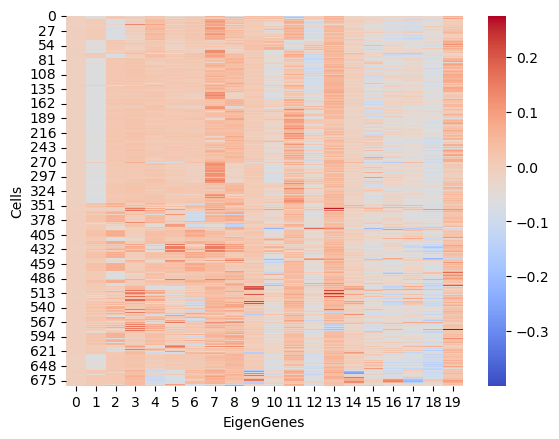

In [38]:
#heatmap
import seaborn as sns

k = 20
zeta = [1,1/2,1/3,1/4,1/5,1/6,2/7,1/8] 
gamma = 1e3
beta = 1e3

RpLSPCA_KNN_ari_mean = 0
RpLSPCA_KNN_nmi_mean = 0
#Principal Components
PDM = RpLSPCA_cal_projections_KNN(X_normalized.T, beta, gamma, k, 15, zeta)
PDM = np.asarray(PDM)
TM = ((np.linalg.inv(PDM.T @ PDM)) @ (PDM.T)).T

#Projected Data Matrix
Q = (X_normalized.T @ TM)
print('Embedded Data Shape (Cells x EigenGenes):', Q.shape)

# Use seaborn to create a heatmap
ax = sns.heatmap(Q, annot=False, cmap="coolwarm", cbar=True)
ax.set_xlabel('EigenGenes')  
ax.set_ylabel('Cells')  
plt.show()

In [39]:
!pip install scanpy

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import matplotlib as mpl
import scanpy as sc
warnings.filterwarnings("ignore")

X = load_X('GSE82187')
y = load_y('GSE82187')

# Log transform data
log_transform = np.vectorize(np.log)
log_X = log_transform(X+1)
print(log_X)
    
# Set values below 1e-6 to 0
log_X[log_X < 1e-6] = 0

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.03956989 1.10395147 ... 0.         0.         1.22507921]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [41]:
# Filter out features with low variance
row_variances = np.var(log_X, axis=1)
variance_threshold = np.percentile(row_variances, 20)  # Adjust the percentile as needed
filtered_X = log_X[row_variances >= variance_threshold]
#print('Gene filtering X shape:', filtered_X.shape)
filtered_X = np.asarray(filtered_X)

# Normalize data
scaler = StandardScaler()
scaler.fit(filtered_X)
X_normalized = scaler.transform(filtered_X)

zetas = [1/8,1/7,1/6,1/5,1/4,1/3,1/2,1]
gamma = 1000
beta = 60

#Principal Components
PDM = RpLSPCA_cal_projections_KNN(X_normalized.T, beta, gamma, 50, 15, zeta)
PDM = np.array(PDM)
PDM = ((np.linalg.inv(PDM.T @ PDM)) @ (PDM.T)).T

#Projected Data Matrix
Q = (X_normalized.T @ PDM)

Visualizations


<Figure size 800x600 with 0 Axes>

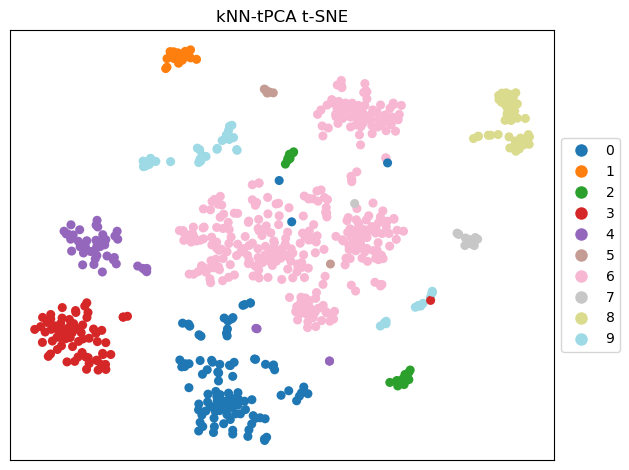

<Figure size 800x600 with 0 Axes>

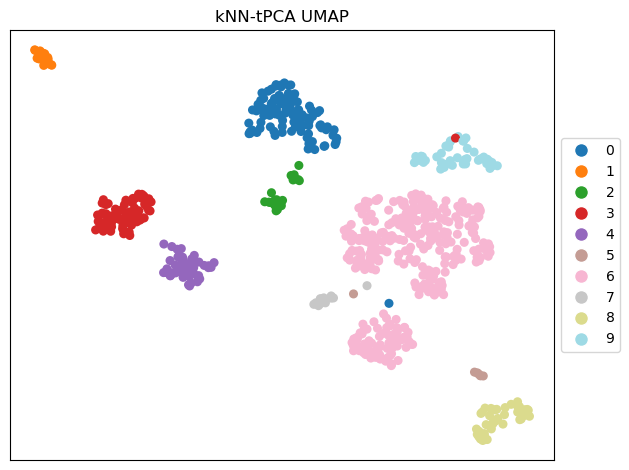

In [42]:
#visualizations
warnings.filterwarnings("ignore")
def visualize_datasets2(datasets, dataset_names):
        # Assuming datasets is a list of (X, y) tuples
        for idx, (X, y) in enumerate(datasets):
            adata = sc.AnnData(X)
            adata.obs['cell_types'] = y

            # Preprocess and compute neighbors
            sc.pp.scale(adata, max_value=10)
            #sc.tl.pca(adata, n_comps=50)  # PCA for preprocessing if input is X
            sc.pp.neighbors(adata)  

            # Compute t-SNE and UMAP
            sc.tl.tsne(adata)
            sc.tl.umap(adata)

            # Get unique labels
            unique_labels = np.unique(y)
    
            # Convert 'cell_types' to categorical type with the order determined by `unique_labels`
            adata.obs['cell_types'] = pd.Categorical(y, categories=unique_labels, ordered=True)

            # Define a color palette
            color_map = plt.cm.get_cmap('tab20', len(unique_labels))
            colors_for_legend = [color_map(i) for i in range(len(unique_labels))]

            # Convert RGBA colors to hex format
            colors_for_legend_hex = [mpl.colors.to_hex(color) for color in colors_for_legend]
    
            # Assign colors based on this ordering
            adata.uns['cell_types_colors'] = colors_for_legend_hex

                   

            # t-SNE 
            plt.figure(figsize=(8,6))
            sc.pl.tsne(adata, color='cell_types', title='kNN-tPCA t-SNE', show=False, legend_loc='none')
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_for_legend[i], markersize=10) for i in range(len(unique_labels))]
            plt.legend(handles, unique_labels, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xlabel("")
            plt.ylabel("")
            plt.tight_layout()
            # Save the figure as a PDF
            #plt.savefig(f"KNN-tsne_{dataset_names[idx]}_figure.pdf", format='pdf')
            plt.show()

            # UMAP plot
            plt.figure(figsize=(8,6))
            sc.pl.umap(adata, color='cell_types', title='kNN-tPCA UMAP', show=False, legend_loc='none')
            handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_for_legend[i], markersize=10) for i in range(len(unique_labels))]
            plt.legend(handles, unique_labels, loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xlabel("")
            plt.ylabel("")
            plt.tight_layout()
            #plt.savefig(f"KNN-umap_{dataset_names[idx]}_figure.pdf", format='pdf')
            plt.show()


# Example usage
print('Visualizations')
dataset_names = ["GSE82817"]
#datasets = [(X.T, y)] #When inputting X, use PCA to preprocess in visualize_datasets()
datasets2 = [(Q, y)] #When inputting Q, do not perform PCA
visualize_datasets2(datasets2, dataset_names) #First input datasets, and then datasets2 for compariosn

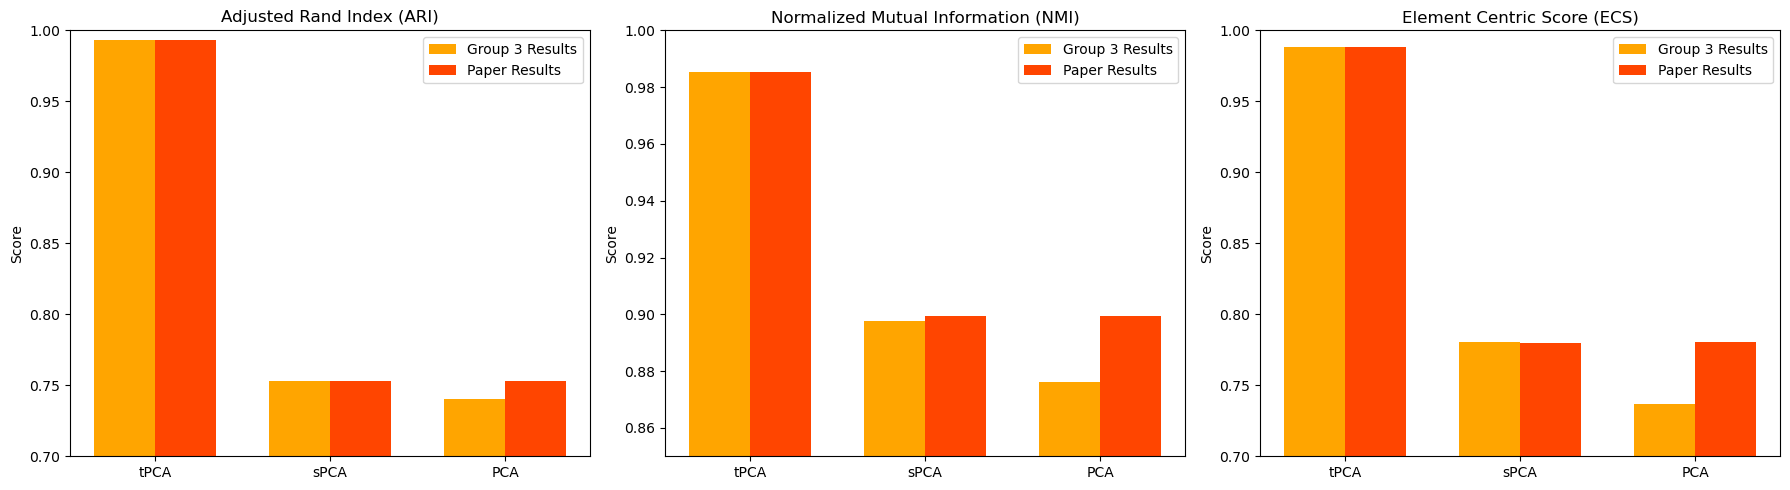

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Methods being compared
methods = ['tPCA', 'sPCA', 'PCA']

# our results
group3_ari = [0.9932, 0.7529, 0.7404]
group3_nmi = [0.9854, 0.8975, 0.8760]
group3_ecs = [0.9885, 0.7802, 0.7370]

# Paper results
paper_ari = [0.9932, 0.7530, 0.7530]
paper_nmi = [0.9853, 0.8995, 0.8995]
paper_ecs = [0.9884, 0.7801, 0.7802]  # from GSE82187

# Bar positions
x = np.arange(len(methods))
width = 0.35

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ARI Plot
axs[0].bar(x - width/2, group3_ari, width, label='Group 3 Results', color='orange')
axs[0].bar(x + width/2, paper_ari, width, label='Paper Results', color='orangered')
axs[0].set_title('Adjusted Rand Index (ARI)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods)
axs[0].set_ylim([0.7, 1.0])
axs[0].set_ylabel('Score')
axs[0].legend()

# NMI Plot
axs[1].bar(x - width/2, group3_nmi, width, label='Group 3 Results', color='orange')
axs[1].bar(x + width/2, paper_nmi, width, label='Paper Results', color='orangered')
axs[1].set_title('Normalized Mutual Information (NMI)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods)
axs[1].set_ylim([0.85, 1.0])
axs[1].set_ylabel('Score')
axs[1].legend()

# ECS Plot
axs[2].bar(x - width/2, group3_ecs, width, label='Group 3 Results', color='orange')
axs[2].bar(x + width/2, paper_ecs, width, label='Paper Results', color='orangered')
axs[2].set_title('Element Centric Score (ECS)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods)
axs[2].set_ylim([0.7, 1.0])
axs[2].set_ylabel('Score')
axs[2].legend()

plt.tight_layout()
plt.show()
